<a href="https://colab.research.google.com/github/luegl/keras-distinguish-own-cat-from-others-model/blob/main/train_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import libraries

In [13]:
from tensorflow import keras
import matplotlib.pyplot as plt

Setup for image preprocessing and augmentation with
ImageDataGenerator, including resizing, normalization, and various augmentation techniques.


In [4]:
IMG_SIZE = (180, 180)
BATCH_SIZE = 16

datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode="nearest"
)

The train_generator loads images from the specified directory, resizes them, processes them in batches, and prepares them for binary classification using the training subset. It does not store all images, only those that are currently needed.

In [10]:
train_generator = datagen.flow_from_directory(
    "drive/MyDrive/datasets/dataset_fla_other",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="training"
)

Found 511 images belonging to 2 classes.


The val_generator loads images from the specified directory, resizes them, processes them in batches, and prepares them for binary classification using the validation subset. It does not store all images, only those that are currently needed.

In [11]:
test_generator = datagen.flow_from_directory(
    "drive/MyDrive/datasets/dataset_fla_other",
    target_size= IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="validation"
)

Found 126 images belonging to 2 classes.


Prints class labels and displays a batch of images with their corresponding labels in a grid.

Class names: {'flaekli': 0, 'other_cats': 1}


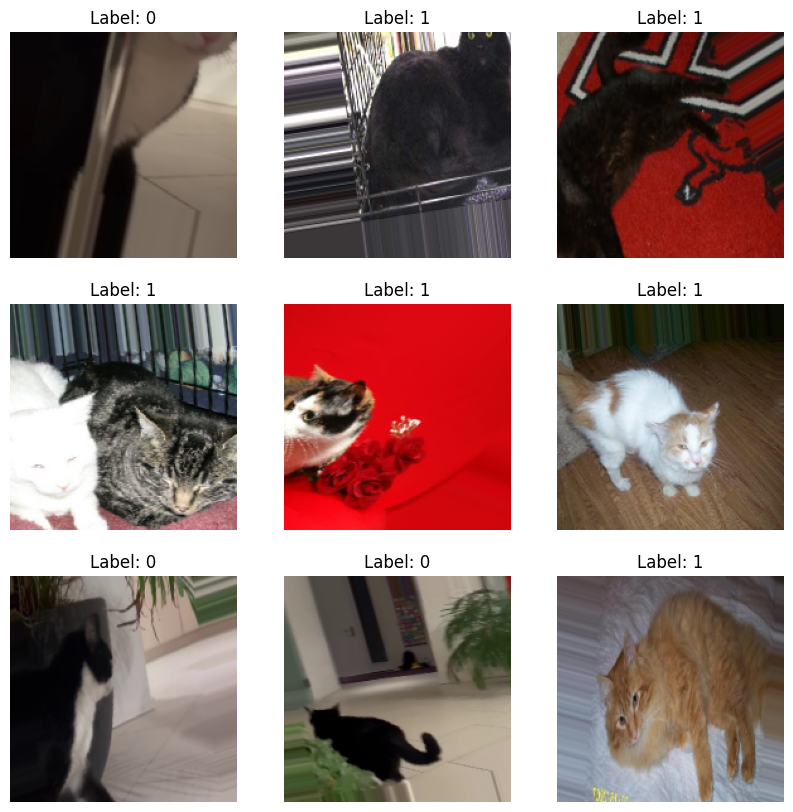

In [14]:
print("Class names:", train_generator.class_indices)

images, labels = next(train_generator)

plt.figure(figsize=(10, 10))
for i in range(min(9, BATCH_SIZE)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f"Label: {int(labels[i])}")
    plt.axis("off")
plt.show()